<a href="https://colab.research.google.com/github/ilanb1/DSP-IP/blob/main/drawing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

generate a black canvas to draw on (think of it, the recommended shape is [50, 50,
3?])

In [1]:
import numpy as np
import matplotlib.pyplot as plt

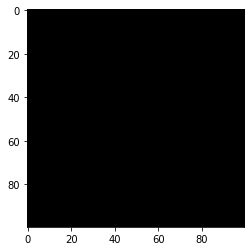

In [2]:
width = 100  # 50 is too small
height = 100
channels = 3
canvas = np.zeros(shape = [height, width, channels])
plt.imshow(canvas)


Write three functions: draw_rectangle, draw_triangle, and draw_circle. Each
function must draw a random shape (respectively to function name), random select
color, and random select location and parameters. Think of end cases that can
produce problems.

In [3]:
import cv2
import random

In [4]:
def draw_rectangle(canvas):

  # Start coordinate
  # represents the top left corner of rectangle
  start_point = (random.randint(0,height-1), random.randint(0,width-1))

  # Ending coordinate
  # represents the bottom right corner of rectangle
  end_point = (random.randint(0,height-1), random.randint(0,width-1))


  # color in BGR
  color = (random.randint(0,255), random.randint(0,255), random.randint(0,255))

  # Line thickness
  thickness = random.randint(1,2)

  # Using cv2.rectangle() method
  image = canvas.copy()
  image = cv2.rectangle(image, start_point, end_point, color, thickness)

  #the final image
  return image.astype("int64")



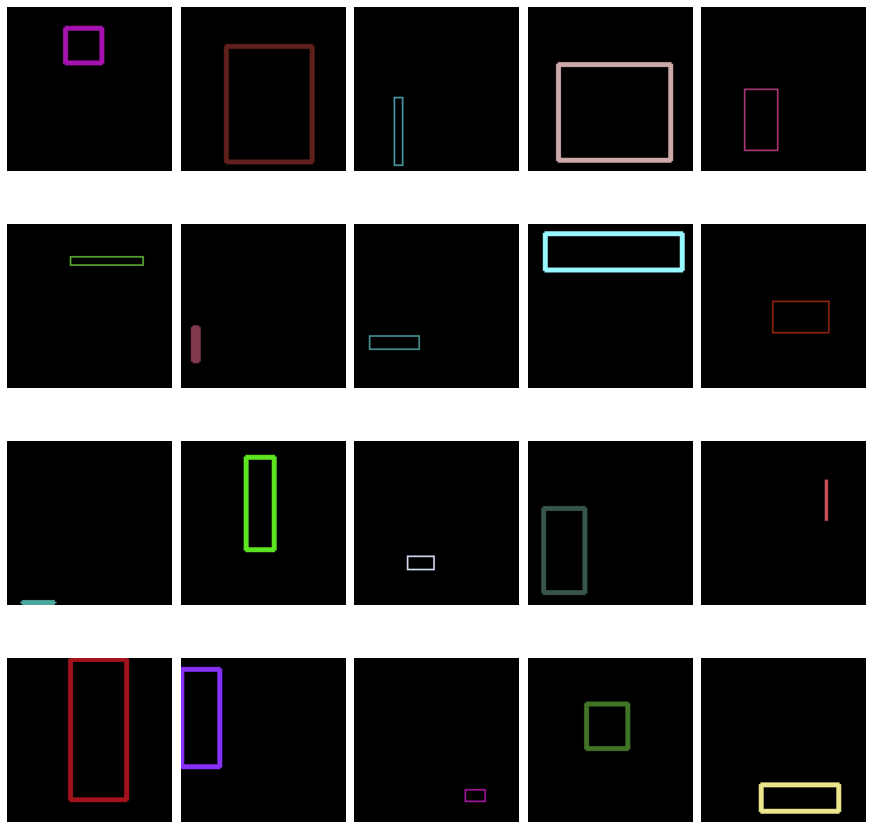

In [5]:
# testing the function:

fig, ax = plt.subplots(4, 5,constrained_layout=True, figsize=(12,12))

for index in range(20):
  image = draw_rectangle(canvas)
  ax[index//5 , index%5].imshow(image)
  ax[index//5 , index%5].axis("off")

In [6]:
def draw_circle(canvas):
  # Center coordinates
  center_coordinates = (random.randint(15, width-15), random.randint(15, height-15))

  # Radius of circle
  max_radius = min(*center_coordinates, height - center_coordinates[1], width - center_coordinates[0] )
  min_radius = 5

  radius = random.randint(min_radius, max_radius)

  # color in BGR
  color = (random.randint(0,255), random.randint(0,255), random.randint(0,255))

  # Line thickness 
  thickness = random.randint(1,2)

  # Using cv2.circle() method
  image = canvas.copy()
  image = cv2.circle(image, center_coordinates, radius, color, thickness)

  # the final image
  return image.astype("int64")


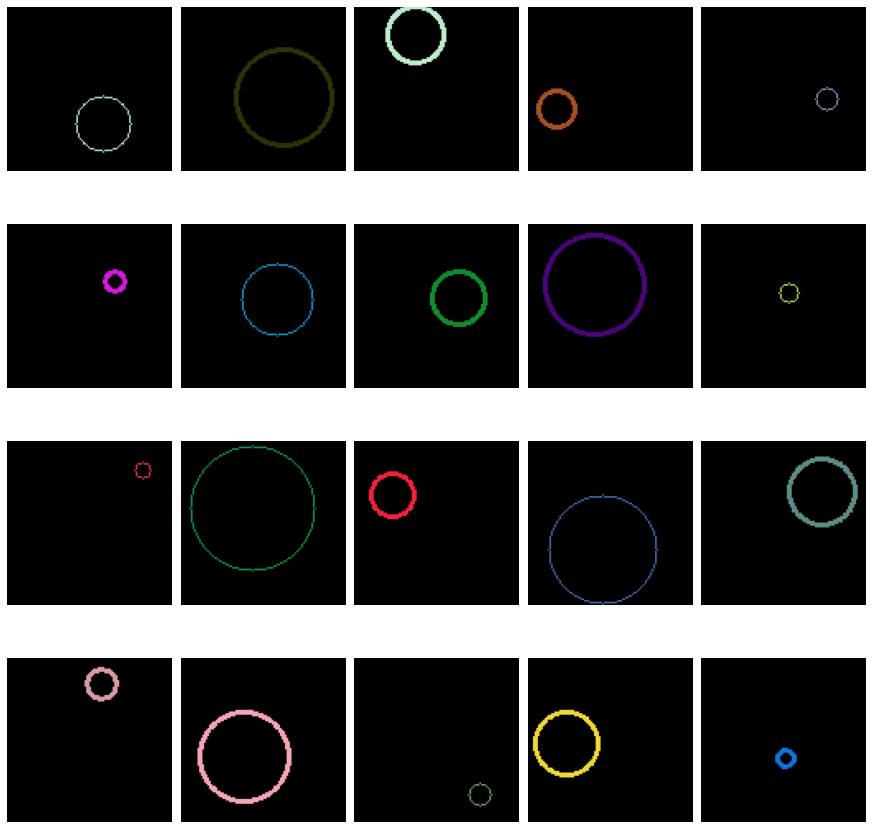

In [7]:
#testing the function:
fig, ax = plt.subplots(4, 5,constrained_layout=True, figsize=(12, 12))

for index in range(20):
  image = draw_circle(canvas)
  ax[index//5 , index%5].imshow(image)
  ax[index//5 , index%5].axis("off")

In [9]:
def draw_triangle(canvas):
  #the 3 vertices of the triangle
  points = np.array([[random.randint(0,height-1), random.randint(0,width-1)] for _ in range(3)])

  # color in BGR
  color = (random.randint(0,255), random.randint(0,255), random.randint(0,255))

  # Line thickness
  thickness = random.randint(1,2)

  # Using cv2.polylines() method
  image = canvas.copy()
  image = cv2.polylines(image, pts = [points], isClosed = True , color = color, thickness= thickness)
  #the final image
  return image.astype("int64")

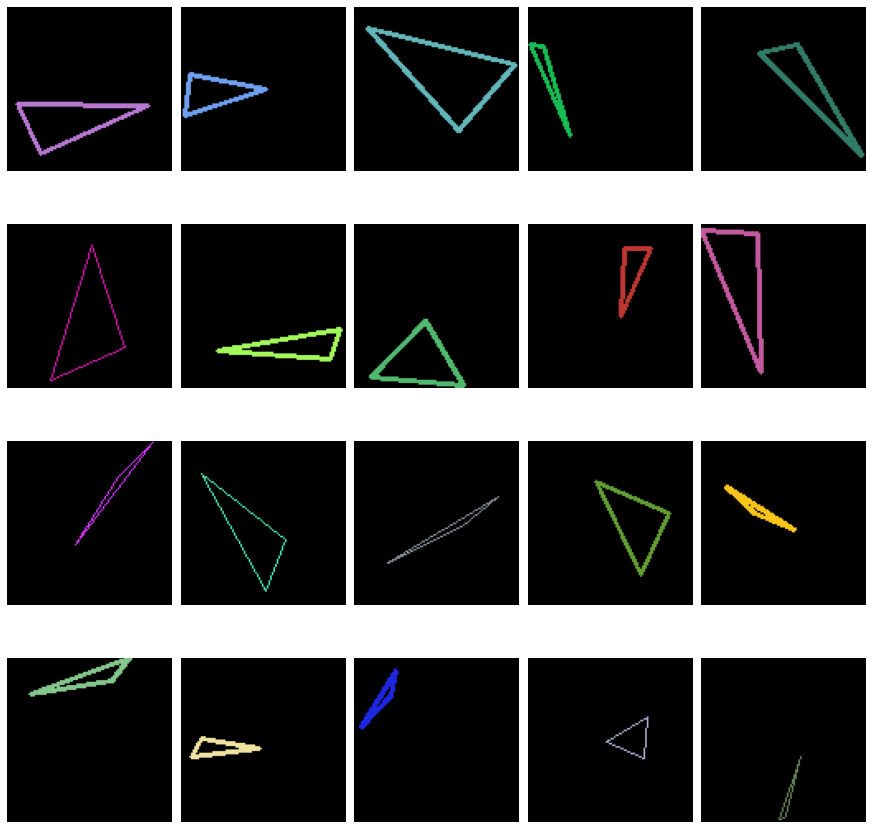

In [10]:
#testing the function:
fig, ax = plt.subplots(4, 5,constrained_layout=True, figsize=(12, 12))

for index in range(20):
  image = draw_triangle(canvas)
  ax[index//5 , index%5].imshow(image)
  ax[index//5 , index%5].axis("off")

Create a rectangle, triangle, and circle folder and fill each one with 300 images
(use the above functions)

In [11]:
! mkdir shapes #create the folder "shapes", inside of it will be the 3 requested folders

In [12]:
%cd shapes

/content/shapes


In [13]:
%pwd # make sure we are in the right place

! mkdir rectangle
! mkdir triangle
! mkdir circle

In [14]:
for index in range(300):
  cv2.imwrite(f"/content/shapes/rectangle/rectangle{index}.png", draw_rectangle(canvas))
  cv2.imwrite(f"/content/shapes/triangle/triangle{index}.png", draw_triangle(canvas))
  cv2.imwrite(f"/content/shapes/circle/circle{index}.png", draw_circle(canvas))

select nine images randomly from the folders (at least one image from each folder),
read them from the disk, put the title directly on the image (folder title, to will cover
some part of the image), and display them as one big image

In [15]:
from PIL import Image
from PIL import ImageDraw

In [16]:
def put_text(image, string):
  img = image.copy()
  # Call draw Method to add 2D graphics in an image
  I1 = ImageDraw.Draw(img)
 
  # Add Text to an image
  I1.text((0, 0), string, fill=(255, 255, 255))
  return img

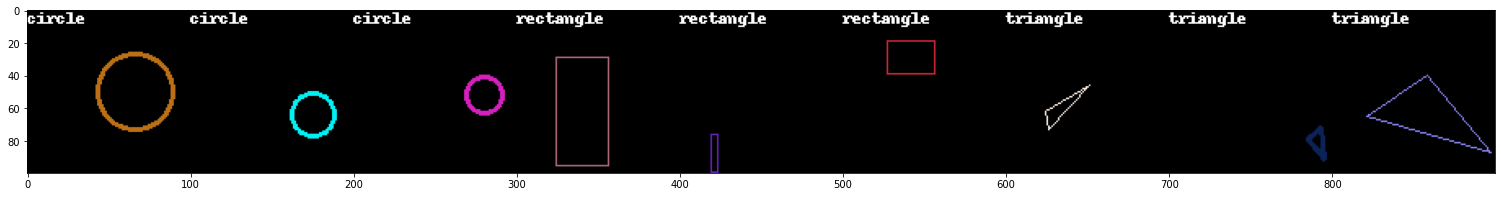

In [17]:
shapes = ["circle", "rectangle", "triangle"]
final_images = []

for shape in shapes:
  for _ in range(3):
    random_index = random.randint(0,299)
    image = Image.open('/content/shapes/' + shape + '/' + shape + f'{random_index}.png')
    text_image = put_text(image,shape)
    final_images.append(text_image)
  
final_image = np.hstack(final_images)
plt.figure(figsize = (27,3))
plt.imshow(final_image)  

#Classifying the images

building simple model to classifying the images:

In [18]:
import tensorflow as tf

In [ ]:
#! rmdir /content/shapes/.ipynb_checkpoints #we cant see this file in the gui. deleting it to get only 3 classes and not 4


rmdir: failed to remove '/content/shapes/.ipynb_checkpoints': No such file or directory


In [177]:
data_dir ='/content/shapes'

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=193,
  shuffle = True,
  class_names = shapes,
  image_size=(height, width),
  batch_size=1)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  shuffle = True,
  seed=193,
  image_size=(height, width),
  batch_size= 1)

Found 900 files belonging to 3 classes.
Using 720 files for training.
Found 900 files belonging to 3 classes.
Using 180 files for validation.


In [178]:
# changing the labels to one hot encodings

train_ds = [[image, tf.keras.utils.to_categorical(label,3)] for image, label in train_ds]
val_ds = [[image, tf.keras.utils.to_categorical(label,3)] for image, label in val_ds]

train_x = [image for [image, label] in train_ds]
train_y = [label for [image, label] in train_ds]

val_x = [image for [image, label] in val_ds]
val_y = [label for [image, label] in val_ds]

# collect back the images and new labels to Dataset
train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))
val_ds = tf.data.Dataset.from_tensor_slices((val_x, val_y))

In [125]:
# shapes of the images and labels
for image, label in train_ds.take(3):
    print(image.numpy().shape, label.numpy().shape)

(1, 100, 100, 3) (1, 3)
(1, 100, 100, 3) (1, 3)
(1, 100, 100, 3) (1, 3)


In [ ]:
for image, label in val_ds.take(120).as_numpy_iterator():
  #img = image[0]
  #plt.imshow(img.astype("int64"))
  print(f"label: {label}")

In [179]:
# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    image = image / 255
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = (
    train_ds
    .map(convert_to_float)
    .unbatch().batch(32)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
val_ds = (
    val_ds
    .map(convert_to_float)
    .unbatch().batch(32)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)


In [87]:
from tensorflow import keras
from tensorflow.keras import layers

In [220]:
model = keras.Sequential([

    # First Convolutional Block
    layers.Conv2D(filters=4, kernel_size=3, activation="relu", padding='same', input_shape=(height, width, 3)),
    layers.MaxPool2D(),
    
    # Second Convolutional Block
    layers.Conv2D(filters=8, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Third Convolutional Block
    layers.Conv2D(filters=16, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # after testing few times, I decided to add another conv block:
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Classifier Head
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=3, activation="softmax"),
])
model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_129 (Conv2D)         (None, 100, 100, 4)       112       
                                                                 
 max_pooling2d_129 (MaxPooli  (None, 50, 50, 4)        0         
 ng2D)                                                           
                                                                 
 conv2d_130 (Conv2D)         (None, 50, 50, 8)         296       
                                                                 
 max_pooling2d_130 (MaxPooli  (None, 25, 25, 8)        0         
 ng2D)                                                           
                                                                 
 conv2d_131 (Conv2D)         (None, 25, 25, 16)        1168      
                                                                 
 max_pooling2d_131 (MaxPooli  (None, 12, 12, 16)     

In [221]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['categorical_accuracy']
)

history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=40,
)

Epoch 1/40
23/23 [==============================] - 1s 40ms/step - loss: 1.0880 - categorical_accuracy: 0.3403 - val_loss: 1.0782 - val_categorical_accuracy: 0.3167
Epoch 2/40
23/23 [==============================] - 0s 11ms/step - loss: 1.0431 - categorical_accuracy: 0.4125 - val_loss: 1.0522 - val_categorical_accuracy: 0.3611
Epoch 3/40
23/23 [==============================] - 1s 63ms/step - loss: 0.9831 - categorical_accuracy: 0.5111 - val_loss: 0.9909 - val_categorical_accuracy: 0.4833
Epoch 4/40
23/23 [==============================] - 0s 11ms/step - loss: 0.8787 - categorical_accuracy: 0.6347 - val_loss: 0.8725 - val_categorical_accuracy: 0.5889
Epoch 5/40
23/23 [==============================] - 0s 10ms/step - loss: 0.6708 - categorical_accuracy: 0.7431 - val_loss: 0.6865 - val_categorical_accuracy: 0.6833
Epoch 6/40
23/23 [==============================] - 0s 10ms/step - loss: 0.5096 - categorical_accuracy: 0.7931 - val_loss: 0.5438 - val_categorical_accuracy: 0.7833
Epoch 7/40

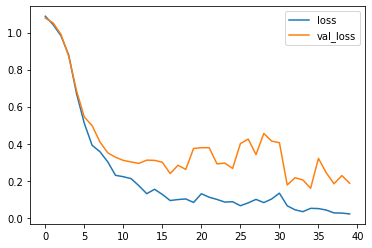

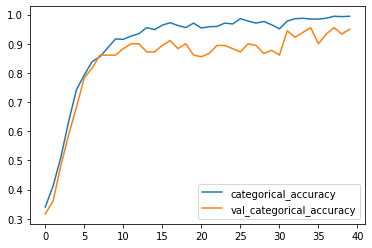

In [222]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot();

checking the results on the validation set:

In [261]:
def predict_label(image):
  img = tf.expand_dims(image, axis=0)
  categorical_class = model(img)
  label = np.argmax(categorical_class) #choosing the max as the predicted class
  return shapes[label] #turn it to the label name

from 180 images in the validation set, predicted 171 labels right. accuracy = 95.0 %
plotting only the 9 examples which the model classifed wrong:


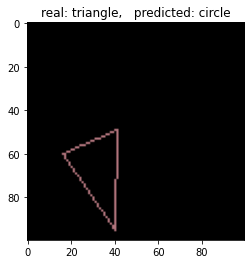

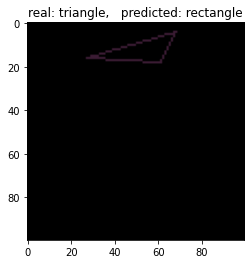

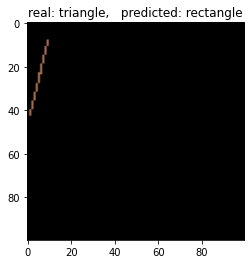

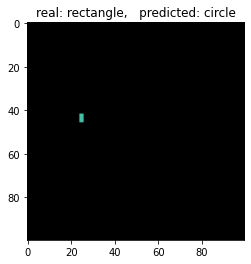

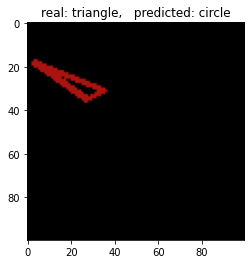

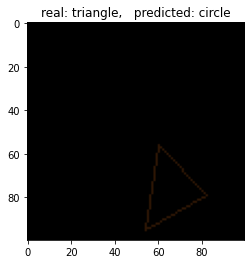

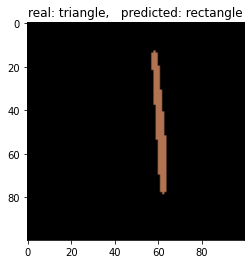

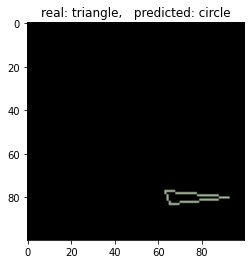

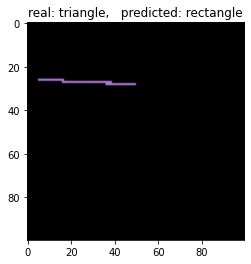

In [283]:
#plotting only the images which the model classifed wrong

errors_counter=0
wrong_labled_list=[]
for image, label in val_ds.unbatch():
  real_label = shapes[np.argmax(label)]
  predicted_label = predict_label(image)
  if real_label != predicted_label:
    errors_counter+=1
    wrong_labled_list.append([image, real_label, predicted_label])

val_size = 180
accuracy= (1- errors_counter / val_size) * 100

print(f"from {val_size} images in the validation set, predicted {val_size-errors_counter} labels right. accuracy = {accuracy} %")
print(f"plotting only the {errors_counter} examples which the model classifed wrong:")

for image, real_label, predicted_label in wrong_labled_list:
  plt.figure()
  plt.imshow(image)
  plt.title(f"real: {real_label},   predicted: {predicted_label}")